In [1]:
import geopandas as gpd

# ONCE
#df = gpd.read_file("https://opendata.arcgis.com/datasets/559d482bad0643f69cbe1538243e0baa_9.geojson")
#df.to_file("lec2covid.geojson")

In [2]:
df = gpd.read_file("lec2download.geojson")
df.head()

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
0,2022-04-07T19:00:00+00:00,55079000101,None,1158,0,0.14,24,0,0.0,0,...,511,568,2022-04-06T06:00:00+00:00,4476,437.0,260,Census tract,7.500609e+06,11159.571995,"POLYGON ((-87.99418 43.19256, -87.99429 43.192..."
1,2022-04-07T19:00:00+00:00,55079000102,None,1159,1,0.43,19,0,0.0,0,...,561,508,2022-04-06T06:00:00+00:00,3468,404.0,261,Census tract,1.224474e+07,15500.211793,"POLYGON ((-87.99449 43.17769, -87.99512 43.177..."
2,2022-04-07T19:00:00+00:00,55079000201,None,1410,0,0.29,10,0,0.0,0,...,722,609,2022-04-06T06:00:00+00:00,5561,699.0,262,Census tract,1.488298e+07,17849.912522,"POLYGON ((-88.02435 43.17761, -88.02434 43.177..."
3,2022-04-07T19:00:00+00:00,55079000202,None,1728,0,0.71,11,0,0.0,0,...,913,738,2022-04-06T06:00:00+00:00,6439,621.0,263,Census tract,1.480524e+07,17742.064041,"POLYGON ((-88.02435 43.17761, -88.02518 43.177..."
4,2022-04-07T19:00:00+00:00,55079000301,None,411,1,0.14,4,0,0.0,0,...,218,172,2022-04-06T06:00:00+00:00,1485,92.0,264,Census tract,3.733793e+06,9142.114479,"POLYGON ((-88.05488 43.14699, -88.05511 43.146..."


In [3]:
# POP, POS_CUM_CP, POS_????_CP, DTH_CUM_CP
df.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

<AxesSubplot:>

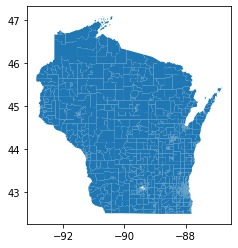

In [4]:
df.plot()

In [5]:
# How can we get a clean dataset of COVID deaths in WI?

In [6]:
# cleanup based on reading documentation
# TODO: in final presentation, quantify how many rows this applied to
df = df.replace(-999, 2) # -999 means it was between 0 and 4

In [7]:
# cleanup based on looking for weird patterns in the data

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

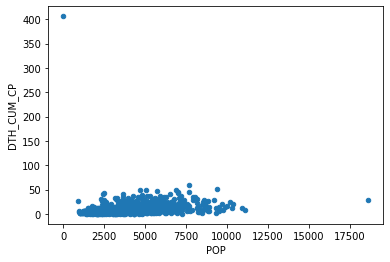

In [8]:
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [9]:
df.sort_values(by="DTH_CUM_CP", ascending=False)

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
916,2022-04-07T19:00:00+00:00,TRACT N/A,None,39838,21,12.43,406,0,0.0,0,...,17979,20213,2022-04-06T06:00:00+00:00,0,NaN,2668,Census tract,4.661914e+02,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."
767,2022-04-07T19:00:00+00:00,55059000602,None,2260,2,0.86,60,0,0.0,0,...,720,1427,2022-04-06T06:00:00+00:00,7708,532.0,2519,Census tract,1.468191e+07,18208.599197,"POLYGON ((-87.84582 42.63908, -87.84604 42.639..."
677,2022-04-07T19:00:00+00:00,55059002602,None,2663,7,2.00,52,0,0.0,0,...,811,1743,2022-04-06T06:00:00+00:00,9367,486.0,2400,Census tract,1.025553e+08,44773.579669,"POLYGON ((-87.88752 42.56687, -87.88789 42.566..."
879,2022-04-07T19:00:00+00:00,55135100600,None,1448,0,0.14,50,0,0.0,0,...,714,669,2022-04-06T06:00:00+00:00,5071,238.0,2631,Census tract,3.632761e+08,100622.628105,"POLYGON ((-89.06994 44.33802, -89.07060 44.338..."
287,2022-04-07T19:00:00+00:00,55101001502,None,1897,1,0.71,50,0,0.0,0,...,1690,89,2022-04-06T06:00:00+00:00,6891,368.0,1247,Census tract,2.466766e+07,24613.421935,"POLYGON ((-87.79587 42.80634, -87.79851 42.806..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2022-04-07T19:00:00+00:00,55079007400,None,654,1,0.71,0,0,0.0,0,...,365,284,2022-04-06T06:00:00+00:00,4073,251.0,269,Census tract,1.713244e+06,5429.884788,"POLYGON ((-87.87063 43.08195, -87.87063 43.081..."
57,2022-04-07T19:00:00+00:00,55117010100,None,309,1,0.14,0,0,0.0,0,...,162,139,2022-04-06T06:00:00+00:00,1463,92.0,318,Census tract,1.959128e+08,70441.577713,"POLYGON ((-87.73177 43.89219, -87.73329 43.892..."
1101,2022-04-07T19:00:00+00:00,55087011300,None,851,0,0.00,0,0,0.0,0,...,455,381,2022-04-06T06:00:00+00:00,3033,184.0,2855,Census tract,2.613983e+06,6866.939222,"POLYGON ((-88.39564 44.28019, -88.39692 44.280..."
260,2022-04-07T19:00:00+00:00,55023960500,None,448,0,0.00,0,0,0.0,0,...,219,212,2022-04-06T06:00:00+00:00,2057,145.0,1220,Census tract,4.496619e+06,12906.142005,"POLYGON ((-91.13825 43.05209, -91.13961 43.052..."


In [10]:
df["GEOID"].str.fullmatch(r"\d+").value_counts()

True     1392
False       1
Name: GEOID, dtype: int64

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

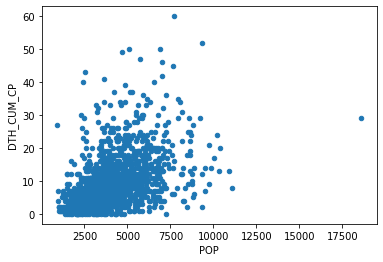

In [11]:
# TODO: in presentation, quantify how many deaths were excluded because of unknown geo
df = df[df["GEOID"].str.fullmatch(r"\d+")]
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [12]:
# How can we train/fit models to known data to predict unknowns?
# Population => Deaths, Cases => Deaths, Cases by Age => Deaths

In [13]:
# USE THIS PATTERN

# model = ????
# model.fit(X, y)
# y2 = model.predict(X2)

In [14]:
# for X values, sklearn wants a DataFrame (or something like it)
# df[["POP"]] # for X values

# for y values, sklearn wants a Series (or something like it)
# df["DTH_CUM_CP"] # for y values

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["POP"]], df["DTH_CUM_CP"]) # training

predict_df = pd.DataFrame({"POP": [1000, 2000, 3000]}) # making prediction for new situations
predict_df["predicted_y"] = model.predict(predict_df)
predict_df

,POP,predicted_y
0,1000,3.627988
1,2000,5.653305
2,3000,7.678623


In [16]:
# How can we visualize model predictions?
predict_df = pd.DataFrame({"POP": range(1, 20000)})
predict_df["predicted_y"] = model.predict(predict_df)
predict_df.head()

,POP,predicted_y
0,1,1.604695
1,2,1.606721
2,3,1.608746
3,4,1.610771
4,5,1.612797


<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

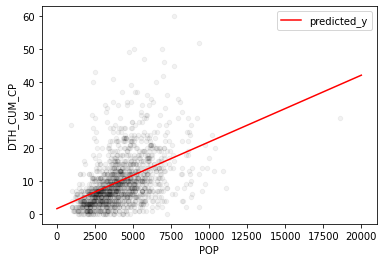

In [17]:
ax = predict_df.plot.line(x="POP", y="predicted_y", color="red")
df.plot.scatter(x="POP", y="DTH_CUM_CP", ax=ax, color="black", alpha=0.05)

In [18]:
# How can we get a formula for the relationship?

In [19]:
model.intercept_ # y intercept

1.6026699609658888

In [20]:
model.coef_

array([0.00202532])

In [21]:
model.coef_[0] # slope of the line

0.00202531765994764

In [22]:
f"deaths ~= {round(model.coef_[0], 6)} * population + {round(model.intercept_, 2)}"

'deaths ~= 0.002025 * population + 1.6'

In [23]:
# How well does our model fit the data?
# r^2 score (explained variance)

In [24]:
before_variance = df["DTH_CUM_CP"].var()
before_variance

64.45856160704695

In [25]:
after_variance = (df["DTH_CUM_CP"] - model.predict(df[["POP"]])).var()
after_variance

51.94852682334216

In [26]:
improvement = before_variance - after_variance
improvement

12.510034783704782

In [27]:
improvement / before_variance # r^2 score (explained variance)

0.19407871463171342

In [28]:
model.score(df[["POP"]], df["DTH_CUM_CP"])  # score will call predict for me on the x value

0.19407871463171344

In [29]:
# Did our model learn, or just memorize (that is, "overfit")?

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
# ERROR PRONE WAY
# X1, y1, X2, y2, test = train_test_split(X, y)

In [32]:
train, test = train_test_split(df)
len(train), len(test)

(1044, 348)

In [33]:
model = LinearRegression()
model.fit(train[["POP"]], train["DTH_CUM_CP"])
model.score(test[["POP"]], test["DTH_CUM_CP"])

0.23419764352552264

In [34]:
# How can we minimize noise due to random train/test splits?
scores = cross_val_score(model, train[["POP"]], train["DTH_CUM_CP"])
scores

array([0.16011167, 0.195638  , 0.14246416, 0.15770199, 0.14945313])

In [35]:
scores.mean()

0.1610737907182081

In [36]:
scores.std()

0.018375728264234087

In [37]:
# How can we compare models?
model1 = LinearRegression()
model2 = LinearRegression()

scores1 = cross_val_score(model1, train[["POP"]], train["DTH_CUM_CP"])
scores2 = cross_val_score(model2, train[["POS_CUM_CP"]], train["DTH_CUM_CP"])

Text(0, 0.5, 'R^2 Score')

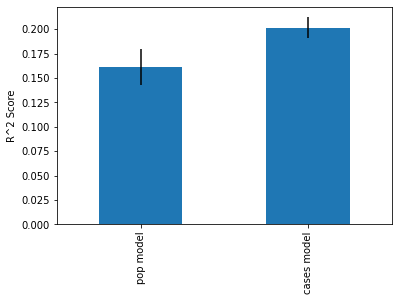

In [38]:
avg = pd.Series({"pop model": scores1.mean(), "cases model": scores2.mean()})
std = pd.Series({"pop model": scores1.std(), "cases model": scores2.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [39]:
df.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

In [40]:
# How can we use multiple x variables (multiple regression)?
# case by age => deaths
xcols = ['POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP']

model = LinearRegression()
model.fit(train[xcols], train["DTH_CUM_CP"])
model.score(test[xcols], test["DTH_CUM_CP"])

0.700307690547201

In [42]:
train.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

In [43]:
# How can we interpret what features the model is relying on?
model

LinearRegression()

In [44]:
model.coef_

array([-2.52180561e-02, -9.22208706e-04, -1.90933310e-04,  1.39575468e-02,
        1.18092624e-02, -1.05933889e-02,  1.00641430e-02,  2.02483048e-02,
        1.89034225e-01,  2.77898615e-01])

In [45]:
xcols

['POS_0_9_CP',
 'POS_10_19_CP',
 'POS_20_29_CP',
 'POS_30_39_CP',
 'POS_40_49_CP',
 'POS_50_59_CP',
 'POS_60_69_CP',
 'POS_70_79_CP',
 'POS_80_89_CP',
 'POS_90_CP']

<AxesSubplot:>

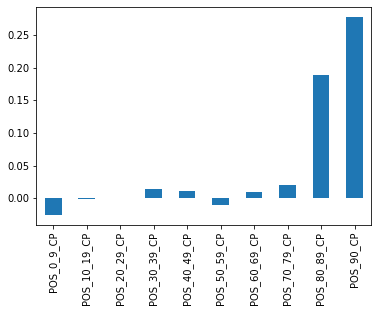

In [46]:
pd.Series(model.coef_, index=xcols).plot.bar()